# TITLE
## Spring 2024 Data Science Project
### Anna Dai, Kylie Gong, Mabel Hong

## Introduction

Our topic is on the airbnb prices across the US. We chose this topic because Airbnb is widely used as an alternative to hotels for travelers or locals for lodging. We are trying to analyze the average prices of Airbnbs between different cities and how prices may vary based on amenities, location, and property type.

The specific question we are trying to answer is: Given specific traits of an Airbnb, such as the city location, room type, and number of reviews, what will be the price per night?

Answering this question can help provide insights for travelers when seeking accommodations, such as finding price range for listings in a specific area and deciding specific features to look for in a listing to reach the ideal price range. By inputting specific features into our model and comparing predicted price per night, travelers can see how accommodations and characteristics of a listing affect price. This allows travelers to know what to look for in a listing to attain their ideal price range or to predict how much it will cost to stay in a listing based on their required accommodations.


**Required Tools:**

For this project, we are using python as the primary coding language and the following libraries:

* pandas
* matplotlib
* scipy
* seaborn
* sklearn

To learn more about installing python and how each of these libraries work, the following resources may be useful:

* https://www.python.org/about/gettingstarted/
* https://pandas.pydata.org/docs/user_guide/index.html
* https://matplotlib.org/stable/users/index
* https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide
* https://seaborn.pydata.org/
* https://scikit-learn.org/stable/getting_started.html

## Data Curation

Our data came from the dataset “U.S. Airbnb Open Data” from www.kaggle.com/datasets/kritikseth/us-airbnb-open-data. This dataset consists of top Airbnb listings from all over the US containing features including host id, hostname, listing id, listing name, latitude and longitude of listing, neighbourhood, price, room type, minimum number of nights, number of reviews, last review date, reviews per month, availability, host listings, and city.

We have decided to drop ....

We have decided to keep ....

Firstly, we imported pandas to read and save our dataset as a dataframe.

In [ ]:
import pandas as pd

Next, we prepared the data for analysis.

In [ ]:
df = pd.read_csv("AB_US_2020.csv")
df = df.drop_duplicates()
df = df.dropna(subset = ['id','price', 'city', 'room_type', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365'])
df = df.drop(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'last_review', 'reviews_per_month'], axis=1)
df

<ipython-input-45-240fadba2c1d>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AB_US_2020.csv")


,id,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,city
0,38585,Private room,60,1,138,1,0,Asheville
1,80905,Entire home/apt,470,1,114,11,288,Asheville
2,108061,Entire home/apt,75,30,89,2,298,Asheville
3,155305,Entire home/apt,90,1,267,5,0,Asheville
4,160594,Private room,125,30,58,1,0,Asheville
...,...,...,...,...,...,...,...,...
226025,45506143,Entire home/apt,104,1,0,2,99,Washington D.C.
226026,45511428,Entire home/apt,151,2,0,1,300,Washington D.C.
226027,45514685,Entire home/apt,240,2,0,1,173,Washington D.C.
226028,45516412,Entire home/apt,60,21,0,5,362,Washington D.C.


## Exploritory Data Analysis

We used matplotlib and seaborn to help visualize our analysis and scipy for statistical tests.

In [ ]:
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import matplotlib as mpl

### Test 1: Test for mean Airbnb price (per night) in each city

city
Asheville            196.639344
Austin               269.290054
Boston               170.331836
Broward County       230.093295
Cambridge            163.072886
Chicago              153.020009
Clark County         213.756660
Columbus             321.718950
Denver               158.860714
Hawaii               309.085986
Jersey City          137.039791
Los Angeles          222.682046
Nashville            215.914155
New Orleans          174.975343
New York City        149.557413
Oakland              139.956617
Pacific Grove        251.111732
Portland             141.029666
Rhode Island         288.720906
Salem                247.727723
San Clara Country    161.721760
San Diego            318.820864
San Francisco        252.018857
San Mateo County     183.909282
Santa Cruz County    257.101209
Seattle              159.720152
Twin Cities MSA      509.906028
Washington D.C.      176.840816
Name: price, dtype: float64
The mean Airbnb price in the US is 219.71652877936558


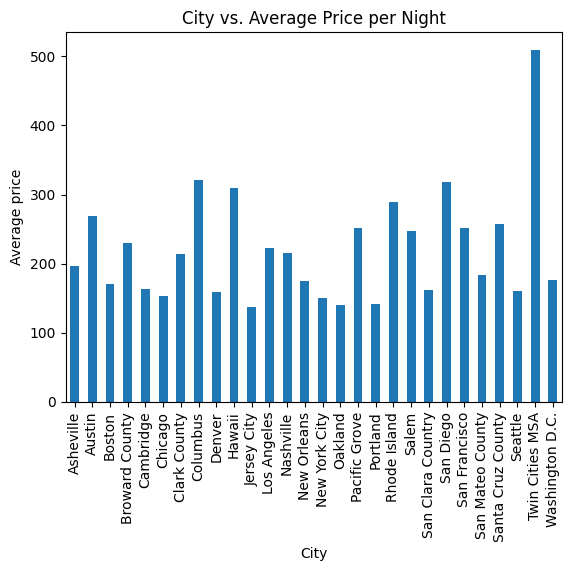

In [ ]:
cityprice = df.groupby("city")["price"].mean()
print(cityprice)
ax = cityprice.plot(kind="bar", x = "city", y = "price average")
ax.set_title("City vs. Average Price per Night")
ax.set_xlabel("City")
ax.set_ylabel("Average price")
mean = df['price'].mean()
print(f'The mean Airbnb price in the US is {mean}')

Text(0.5, 1.0, 'City and Price with Confidence Intervals')

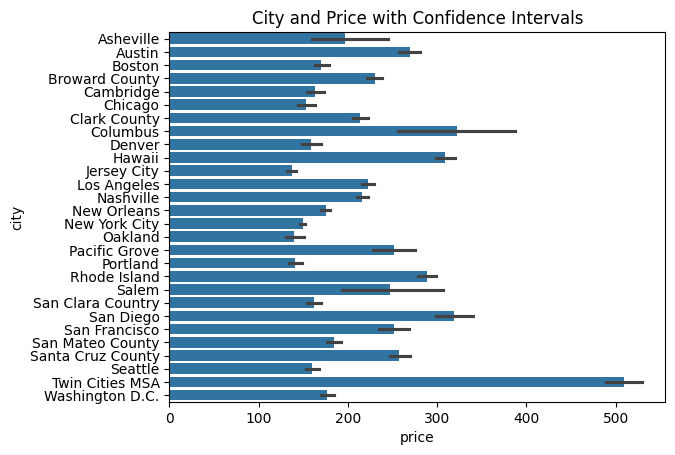

In [ ]:
ax = sns.barplot(df, y = "city", x = "price")
ax.set_title("City and Price with Confidence Intervals")

In our first test, we found the means of the prices in each city. In 2020, the mean Airbnb price per night in each city is shown above. The overall mean Airbnb price per night in the US is $219.72. The Twin Cities had the highest mean price while Jersey City had the lowest mean price.

***Hypothesis Text Using ANOVA***

We want to test if the location of the Airbnb has an affect on the average Airbnb price per night, and so we conduct a hypothesis test using the following hypotheses:

>$H_0$: The Airbnb's city location does not affect the price per night.

>$H_A$: The Airbnb's city location does affect the price per night.

Since we are comparing the mean price between multiple groups (the different cities), we proceed with an ANOVA test with $a=0.05$

In [ ]:
table = pd.crosstab(df['price'], df['city']);
table = pd.DataFrame(table);
F, p = scipy.stats.f_oneway(table['Asheville'], table['Austin'],table['Boston'],
                            table['Broward County'], table['Cambridge'],
                            table['Chicago'], table['Clark County'],
                            table['Columbus'], table['Denver'], table['Hawaii'],
                            table['Jersey City'], table['Los Angeles'],
                            table['Nashville'], table['New Orleans'],
                            table['New York City'], table['Oakland'],
                            table['Pacific Grove'], table['Portland'],
                            table['Rhode Island'], table['Salem'],
                            table['San Clara Country'], table['San Diego'],
                            table['San Francisco'], table['San Mateo County'],
                            table['Santa Cruz County'], table['Seattle'],
                            table['Twin Cities MSA'], table['Washington D.C.']);
p

0.0

We calculated a p-value of approximately 0*. Because our p-value is less than alpha, we reject the null hypothesis, and we conclude that the city where the Airbnb is located does have an affect on the Airbnb price per night.

To find out which of the different groups differ signficantly from each other, we will need to conduct post hoc tests between each of the different cities.

>*Note: The actual p-value is not 0, but because we are comparing so many different groups of data, we get a value so small that the `scipy.stats.f_oneway` function could only represent it as 0.

### Test 2: Hypothesis Test using ANOVA

We want to test if the Airbnb room type has an affect on the average Airbnb price per night, and so we conduct a hypothesis test using the following hypotheses:

> $H_0$: The type of room does not affect the price per night.

> $H_A$: The type of room does affect the price per night.

Since we are comparing the mean price between multiple groups (the different room types), we proceed with an ANOVA test with $a = 0.05$

In [ ]:
table = pd.crosstab(df['price'], df['room_type']);
table = pd.DataFrame(table);
F, p = scipy.stats.f_oneway(table['Private room'], table['Entire home/apt'],table['Shared room'], table['Hotel room']);
p

4.133984424206513e-53

We calculated a p-value of $4.13^{-53}$. Because our p-value is less than alpha, we reject the null hypothesis, and we conclude that the type of room does have an affect on the Airbnb price per night.

To find out which of the different groups differ signficantly from each other, we will need to conduct post hoc tests between each of the different room types.

Text(0, 0.5, 'Average price')

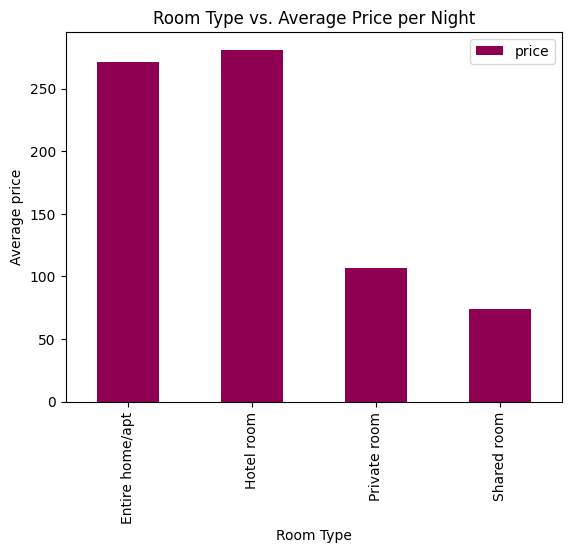

In [ ]:
roomprice = df.groupby('room_type')['price'].mean()
ax = roomprice.plot(kind = "bar", legend = "true", colormap = "PiYG")
ax.set_title("Room Type vs. Average Price per Night")
ax.set_xlabel("Room Type")
ax.set_ylabel("Average price")

Text(0, 0.5, 'Average price')

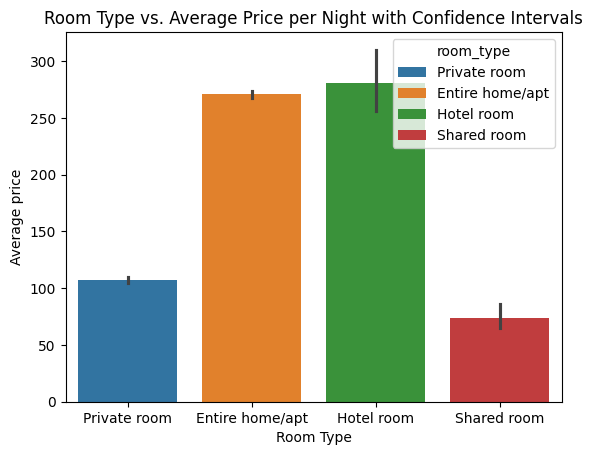

In [ ]:
ax = sns.barplot(df, x = 'room_type', y = 'price', hue = 'room_type', legend = "brief")
ax.set_title("Room Type vs. Average Price per Night with Confidence Intervals")
ax.set_xlabel("Room Type")
ax.set_ylabel("Average price")

From our bar graph of the mean Airbnb price per night for each of the different room types, we can see that entire home/apt rooms and hotel rooms have a much higher mean price than private and shared rooms.

### Test 3: Test for Standard Deviation and Outliers

In our third test, we plotted a box and whisker plot of our dataframe to visualize standard deviation and outliers of our data set for the price column.

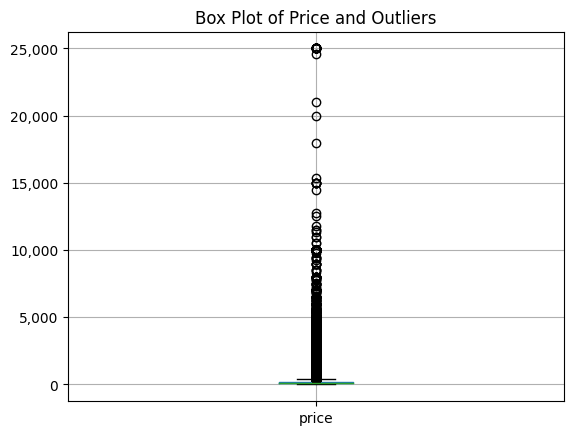

In [ ]:
price = pd.DataFrame(df['price'])
ax = price.boxplot()
ax.set_title("Box Plot of Price and Outliers")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

Text(0.5, 1.0, 'Box Plot without Outliers')

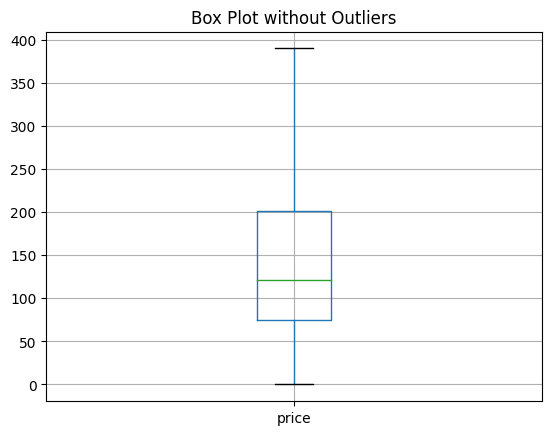

In [ ]:
ax = price.boxplot(showfliers=False)
ax.set_title("Box Plot without Outliers")

From this visualization, you can see that there exists a high volume of outliers, specifically in the price range of \$400-\$25,000. Additionally, we provided a box and whisker plot without outliers, showing that Q1 is approximately \$75 while Q3 is approximately \$200.

In [ ]:
lower = df['price'].quantile(0.01)
upper = df['price'].quantile(0.99)
outliers = df[(df['price'] < lower) | (df['price'] > upper)]
print(outliers[['id','price']])

              id  price
894     24697002     19
916     25138871     19
941     25948248     20
972     26634224     19
1231    32067034  10000
...          ...    ...
225353  43078498      0
225745  44909876     21
225779  45079632   2000
225991  45440573     23
226001  45471159     23

[3849 rows x 2 columns]


In [ ]:
price.std()

price    570.353609
dtype: float64

To support our findings and provide additional observations on outliers, we created a dataframe with the id and price of outliers which reside below the 1st percentile and above the 99th percentile of price across all AirBnB's. This showed that there exists 3,849 outliers defined below the 1st percentile and above the 99th percentile. Finally, we found and printed the standard deviation of price across our dataset and we found it to be approximately 570.35.

Because we visualized and identified 3,849 outliers, this observation supports our ANOVA test on our first hypothesis test comparing means of prices across cities, where we reject the null hypothesis and conclude that city does affect Airbnb price. Because we found so many outliers, this observation supports that there is a significant difference between the means of price across each city, since the data we are working with consists of different distributions for the different cities. It could be that most cities have much lower prices while other cities tend to have extremely high prices, and so when observing the boxplot of our entire dataset we see a large number of outliers that are greater than the maximum value in the box plot.

### Conclusion from exploritory analysis

From our three different statistical tests, we find that the Airbnb price per night can be affected by multiple factors, such as the city and the room type. Some cities, such as the Twin Cities and Columbus, have a much higher average price per night, while cities like Jersey City will have a much lower average price per night. Additionally, when looking at the different Airbnb room types, home/apt rooms and hotel rooms have a much higher mean price than private and shared rooms.

## Primary Analysis

We have decided to use random forest regression to help us answer the questions of how prices may vary due to features such as room type, price, minimum nights, number of reviews, availability, city, number of host listings. We chose random forest because we are predicting an outcome based on many different traits of the AirBnb, and this model is suitable for this type of categorical data. Additionally, it allows the machine learning model to prevent being overfit to the dataset in order to predict price compared to a singular decision tree.

We used sklearn to conduct random forest regression analysis.

## Insights and Conclusions